In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] =  (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    
    for i in range(n):
        for j in range(i + 1):
            print(coef[i][j], end="\t")
        print()
    
    return coef

def divided_diff_forward(x, y):
    '''
    Function to calculate the divided differences table using forward differences.
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:, 0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i][j - 1] - coef[i + 1][j - 1]) / (x[i] - x[i + j])
    

    for i in range(n):
        print(x[i], end = "\t");
        for j in range(n - i):
            print(coef[i][j], end = "\t");
        print("");
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

-5	-2.0	2.0	-1.4	0.4857142857142857	
-1	6.0	-5.0	2.0	
0	1.0	1.0	
2	3.0	


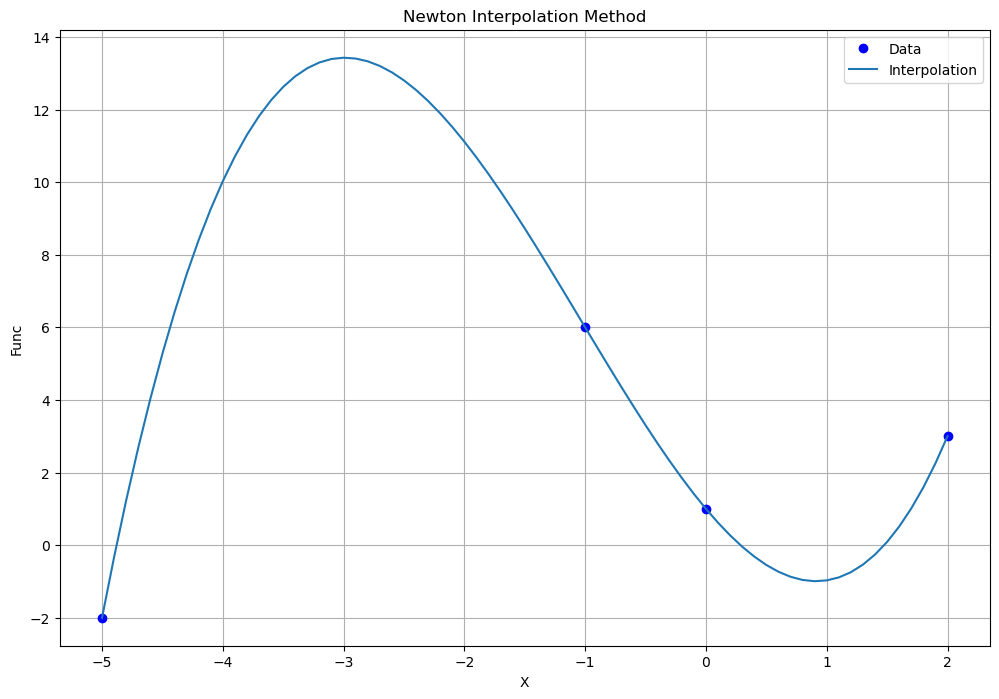

In [3]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
#a_s = divided_diff(x, y)[0, :]
a_s = divided_diff_forward(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5,2.1,0.1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.xlabel("X")
plt.ylabel("Func")
plt.title("Newton Interpolation Method")
plt.grid()
plt.legend(['Data','Interpolation'])